# Data Description

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

# Import Required Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [9]:
#importing dataset from github

df=pd.read_csv('https://github.com/dsrscientist/dataset1/raw/master/abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [10]:
df.shape

(4177, 9)

We have a 4177 rows and 9 columns in the dataset.

In [11]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

We have to change the sex column as a num through the label encoder

In [12]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
df["Sex"]=LE.fit_transform(df["Sex"])
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


We have labelencoded for "Sex" Column alone

In [13]:
df.dtypes

Sex                 int32
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [18]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

# Describe Dataset

In [19]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Based on the above data - we can see the outlier and skewness in the data. So we will rectify this in upcoming step

In [21]:
#Checking the null value in the dataset

df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

We don't have a null value in the dataset. However, we will cross check with heatmap in next step.

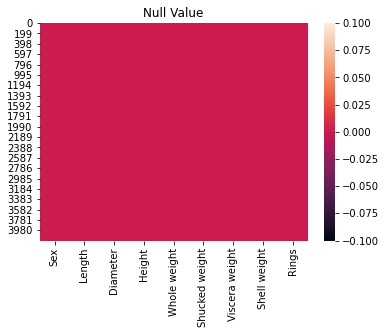

In [22]:
sns.heatmap(df.isnull())
plt.title("Null Value")
plt.show()

# Correlation

In [23]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


Based on the above data - We can see the correlation as well as in heatmap.

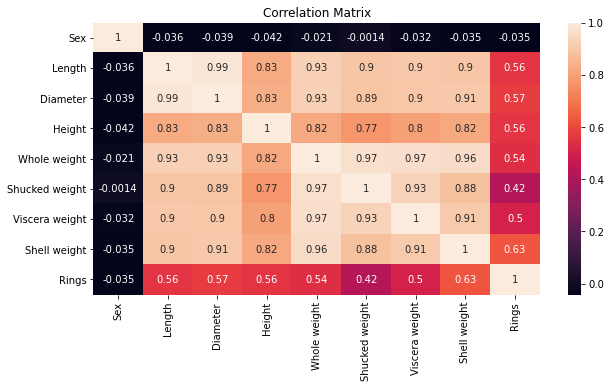

In [25]:
Corr=df.corr()
plt.figure(figsize=[10,5])
sns.heatmap(Corr,annot=True)
plt.title("Correlation Matrix")
plt.show()

On the above data - All the column is positively corelated with target column except "Sex" column because we have label encoded this column

Max Correlation with Shell weight(63%)

Min Correlation with shucked weight(42%)

# Outlier Checking

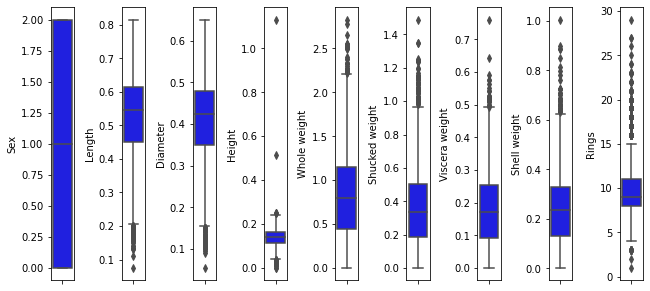

In [31]:
Outlier=df.columns.values
ncol=20
nrow=10
plt.figure(figsize=(ncol,2*ncol))
for i in range (0,len(Outlier)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[Outlier[i]],color='blue',orient='v')
    plt.tight_layout()

Here, we can see the outlier in all the columns except "Sex" & "Rings" columns as not required to consider the outlier because Sex column is label encoded and rings column is target.
We will rectify the outlier in further steps

# Shewness Checking

In [32]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

Here, we can consider the -+.6 is standard based on the data but not a standarded for all the data.

we can see Height & Shucked weight column have a shewness. Also, we can leave Rings column because that is target.

# Data Cleaning Process

Removing Outlier

In [33]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(4177, 9)

In [34]:
threshold = 3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [35]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(4177, 9)
(4027, 9)


We have a new shape and old shape in the data. Old one have a 4177 row and new one having a 4027 rows

In [36]:
Loss_percentage=(1599-1468)/1599*100
print(Loss_percentage)

8.19262038774234


In [37]:
X=df_new.iloc[:,:-1]
Y=df_new.iloc[:,-1]

Checking the skewness again before proceeding the skewness remove process

In [72]:
X.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
dtype: float64

We don't have a skewness based on the above data. Hence, we are not proceeding the skewness process.

# Finding the best Random State for Linear Regression

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0
for i in range (0,500):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.33,random_state=i)
    LR =LinearRegression()
    LR.fit(X_train,Y_train)
    predrf=LR.predict(X_test)
    R2 = r2_score(Y_test, predrf)
    if R2>maxAccu:
        maxAccu=R2
        maxRS=i
print("Best Accuracy is",maxAccu,"on Random state",maxRS)

Best Accuracy is 0.5570433991295716 on Random state 220


# Creating Train-Test Split

In [102]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.33,random_state=220)

# Model Saving

In [106]:
import pickle
filename='Abalone.obj'
pickle.dump(LR,open(filename,'wb'))

# Conclusion

In [103]:
Conc=np.array(Y_test)
Predicted=np.array(LR.predict(X_test))
df_con=pd.DataFrame({"Original":Conc,"Predicted":Predicted},index=range(len(Conc)))
df_con

,Original,Predicted
0,12,12.056169
1,8,7.542317
2,10,11.321440
3,11,11.666842
4,8,9.538343
...,...,...
1324,7,7.755349
1325,9,8.574031
1326,7,8.085643
1327,9,10.210834


Here, we have the prediction for this model.